In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
file_dir = os.path.join(os.getcwd(), 'openpowerlifting-2020-02-15', 'openpowerlifting-2020-02-15.csv')
data = pd.read_csv(file_dir)


list(data.columns)


['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Wilks',
 'McCulloch',
 'Glossbrenner',
 'IPFPoints',
 'Tested',
 'Country',
 'Federation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetName']

In [138]:

data['MaxDL'] = data[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)

ipfList = ['AfricanPF', 'AsianPF', 'CommonwealthPF', 'EPF', 'FESUPO', 'NAPF', 'NordicPF',
    'OceaniaPF', 'ORPF', 'USAPL', 'BP', 'EPA', 'ScottishPL', 'WelshPA', 'FALPO', 
    'CPU', 'HPLS', 'CSST', 'DSF', 'SVNL', 'FFForce', 'BVDK', 'KRAFT', 'IrishPF', 'JPA',
    'KPF', 'LPF', 'FEMEPO', 'NPB', 'NZPF', 'NSF', 'PAP', 'PZKFiTS', 'FPR', 'PLZS', 
    'AEP', 'SSF', 'ThaiPF', 'UkrainePF', 'IPF', 'VPF']
ipfdf = data[data['Federation'].isin(ipfList)]

ipfdf = ipfdf[ipfdf['Equipment'].isin(['Raw'])]
ipfdf = ipfdf[ipfdf['Event'] == 'SBD']
ipfdf = ipfdf[ipfdf['Sex'] == 'M']

nonipfdf = data[data['Federation'].isin(ipfList) == False]
nonipfdf = nonipfdf[nonipfdf['Equipment'].isin(['Raw'])]
nonipfdf = nonipfdf[nonipfdf['Event'] == 'SBD']
nonipfdf = nonipfdf[nonipfdf['Sex'] == 'M']

nonipftesteddf = nonipfdf[nonipfdf['Tested'] == 'Yes']


In [143]:
# nonipftesteddf.sort_values(by='MaxDL', ascending=False)

nonipftesteddf['MaxDL'].describe


<bound method NDFrame.describe of 1224         NaN
1255         NaN
1256         NaN
1276         NaN
1315         NaN
           ...  
1774004    225.0
1774005    200.0
1774006    220.0
1774007    265.0
1774008    242.5
Name: MaxDL, Length: 40575, dtype: float64>

In [131]:
dltesteddf = ipfdf[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)
dltesteddf = dltesteddf[~np.isnan(dltesteddf)]
dltesteddf = [item for item in dltesteddf if item >= 0]


dlnonipftested = nonipftesteddf[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)
dlnonipftested = dlnonipftested[~np.isnan(dlnonipftested)]
dlnonipftested = [item for item in dlnonipftested if item >= 0]


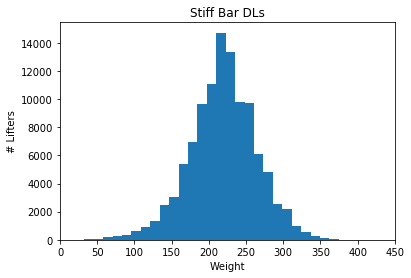

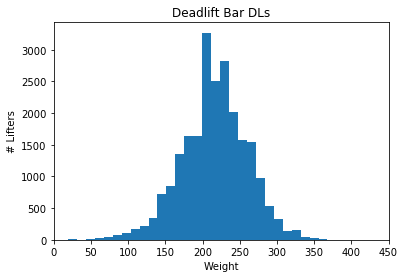

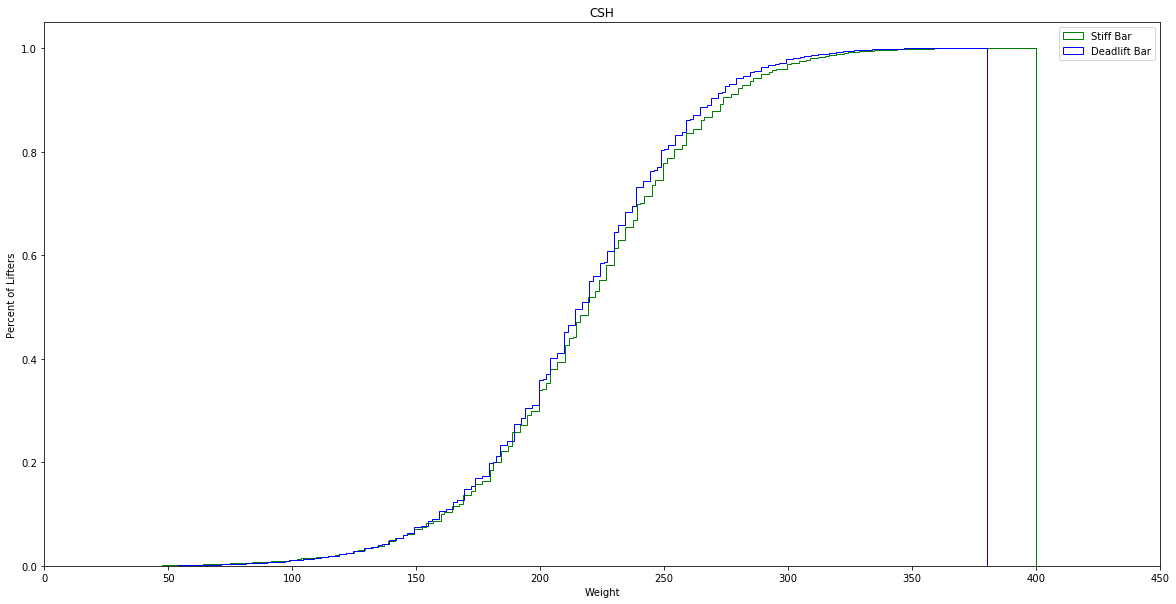

In [132]:
plt.hist(dltesteddf, bins=30)
plt.xlim(0, 450)
plt.title('Stiff Bar DLs')
plt.ylabel('# Lifters')
plt.xlabel('Weight')
plt.show()

plt.hist(dlnonipftested, bins=30)
plt.xlim(0, 450)
plt.title('Deadlift Bar DLs')
plt.ylabel('# Lifters')
plt.xlabel('Weight')
plt.show()

plt.figure(figsize=(20,10))
plt.hist(dltesteddf, bins=250, histtype='step', normed=1, cumulative=True, color='green', label='Stiff Bar')
plt.hist(dlnonipftested, bins=250, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')
plt.xlim(0, 450)
plt.legend(loc='left')
plt.title('CSH')
plt.ylabel('Percent of Lifters')
plt.xlabel('Weight')
plt.show()


In [122]:
from scipy import stats

stats.ks_2samp(dltesteddf, dlnonipftested)

Ks_2sampResult(statistic=0.03318555453032168, pvalue=1.2117251709991842e-18)

In [123]:
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample

rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.20833333333333334, pvalue=5.129279597815284e-05)

In [125]:
rvs2

array([ 1.39193783e+00,  2.55811190e+00, -8.90152195e-01,  3.04987382e-01,
       -5.27856065e-01, -3.29074673e-01, -2.07137001e+00, -1.53305980e+00,
       -1.41762079e+00, -6.15314892e-01, -1.35763169e+00, -2.79469148e-01,
       -3.86605242e-01,  1.31702121e+00, -9.82354500e-02, -6.50188129e-01,
        1.96972149e+00, -1.07432319e+00,  1.87310875e+00,  2.20089621e+00,
       -7.41100441e-01, -1.73298371e+00,  9.21152221e-01,  1.65502240e-01,
       -1.27657184e+00, -2.46969259e+00,  2.58117161e+00,  4.88413085e-01,
        1.02848241e+00, -2.39853617e+00,  1.48854510e+00, -2.47577484e-01,
        1.96359252e+00, -9.50132042e-01,  2.00058982e+00, -3.82095856e-03,
        2.05016643e+00, -8.00987215e-01,  1.42955850e+00,  2.47674767e+00,
       -5.19105579e-01,  5.29541088e-01,  7.36707311e-01, -3.12809810e+00,
        1.70496627e-01, -4.99237237e-01, -2.81019066e-02,  3.19843081e+00,
        2.22582165e-01,  4.33907468e+00,  1.14161615e-01, -4.62469024e+00,
       -9.05922213e-01, -